In [282]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [283]:
df_train = pd.read_csv('../input/train.csv');
df_test = pd.read_csv('../input/test.csv')
entiredata = [df_train, df_test]
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
#features in training dataset 1 Answer
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [285]:
#5 Answer
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [286]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [287]:
# 6 Answer
df_train.info()

# 7 Answer
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [288]:
#8 Answer
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Shellard, Mr. Frederick William",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [289]:
#9 Answer
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [290]:
#10 Answer
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [291]:
#11 Answer
df_train['AgeBand'] = pd.cut(df_train['Age'], 20)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand']).mean().sort_values(by='AgeBand', ascending=True)

,Survived
AgeBand,
"(0.34, 4.399]",0.675000
"(4.399, 8.378]",0.642857
"(8.378, 12.357]",0.266667
"(12.357, 16.336]",0.483871
"(16.336, 20.315]",0.341772
"(20.315, 24.294]",0.367347
"(24.294, 28.273]",0.352941
"(28.273, 32.252]",0.416667
"(32.252, 36.231]",0.479452


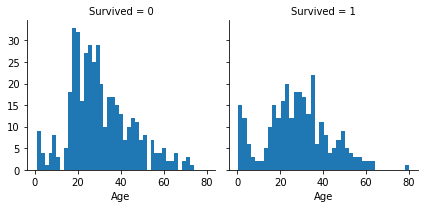

In [292]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=40)

In [293]:
#12 Answer
df_train.groupby(["Pclass"])["Survived"].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

C:\Users\priya\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


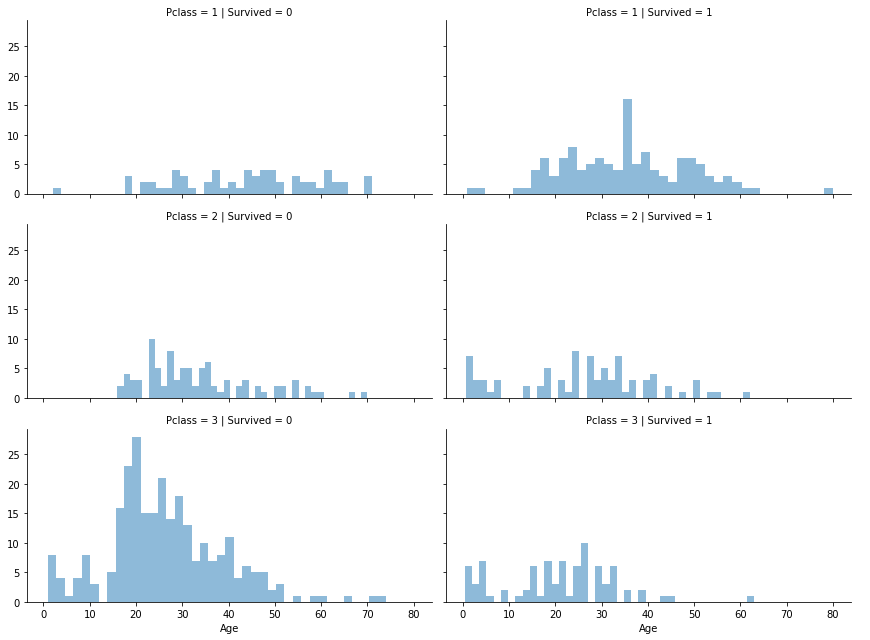

In [294]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=3, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=40)
grid.add_legend();

In [295]:
df_train[['Pclass', 'Age']].groupby(['Pclass'], as_index=False).min()

,Pclass,Age
0,1,0.92
1,2,0.67
2,3,0.42


In [296]:
df_train[['Pclass', 'Age']].groupby(['Pclass'], as_index=False).max()

,Pclass,Age
0,1,80.0
1,2,70.0
2,3,74.0


In [297]:
df_train[['Pclass', 'Age']].groupby(['Pclass'], as_index=False).count()

,Pclass,Age
0,1,186
1,2,173
2,3,355


In [298]:
#13 Answer
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand']).mean().sort_values(by='FareBand', ascending=True)

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


C:\Users\priya\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


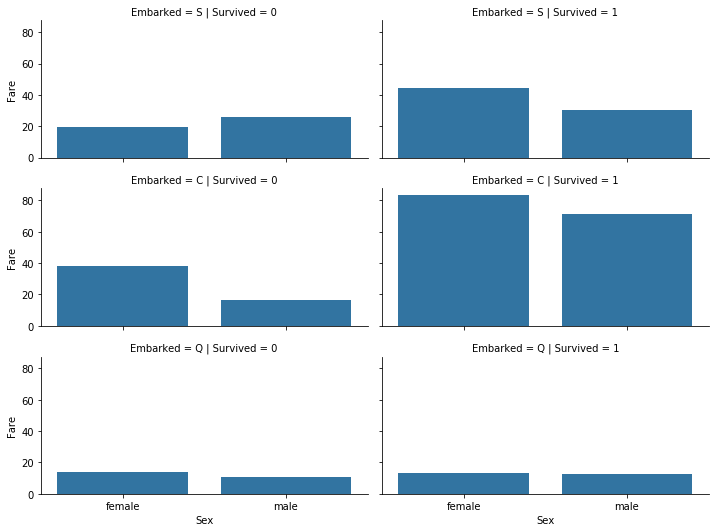

In [299]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.5, aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

In [300]:
# 14 Answer 
df_train['Ticket'].count() - np.count_nonzero(df_train['Ticket'].unique())

210

In [301]:
#15 Answer
df_train['Cabin'].isnull().sum(axis = 0)

687

In [302]:
df_test['Cabin'].isnull().sum(axis = 0)

327

In [303]:
#16 Answer
for data in entiredata:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 24.294]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(36.231, 40.21]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 28.273]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(32.252, 36.231]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 36.231]","(7.91, 14.454]"


In [304]:
#17 Answer
df_test['Age'].isnull().sum(axis = 0)

86

In [305]:
df_train['Age'].isnull().sum(axis = 0) 

177

In [307]:
#method1 SEX(0,1) Pclass(1,2,3)
pred_ages = np.zeros((2,3))
pred_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [308]:
for data in entiredata:
    for i in range(0, 2):
        for j in range(0, 3):
            pred_df = data[(data['Sex'] == i) & \
                                  (data['Pclass'] == j+1)]['Age'].dropna()
            age_pred = pred_df.median()
            
    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                    'Age'] = pred_ages[i,j]

    data['Age'] = data['Age'].astype(int)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 24.294]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,"(36.231, 40.21]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 28.273]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,"(32.252, 36.231]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,"(32.252, 36.231]","(7.91, 14.454]"


In [309]:
#method2
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
Xtrans = imputer.fit_transform(df_train[{'Age'}])
Xtrans
for i in range(0, 891):
    df_train.loc[i,'Age'] = Xtrans[i][0] 
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 24.294]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(36.231, 40.21]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 28.273]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(32.252, 36.231]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 36.231]","(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,"(24.294, 28.273]","(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,"(16.336, 20.315]","(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,"(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,"(24.294, 28.273]","(14.454, 31.0]"


In [310]:
df_train['Age'].isnull().sum(axis = 0) 

0

In [311]:
#18 Answer
fport = df_train.Embarked.dropna().mode()[0]
fport

'S'

In [312]:
for data in entiredata:
    data['Embarked'] = data['Embarked'].fillna(fport)
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 24.294]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(36.231, 40.21]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 28.273]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(32.252, 36.231]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 36.231]","(7.91, 14.454]"


In [313]:
df_train[{'Embarked'}].isnull().sum()

Embarked    0
dtype: int64

In [314]:
#19 Answer
df_test[{'Fare'}].isnull().sum()

Fare    1
dtype: int64

In [315]:
ffare = df_test.Fare.dropna().mode()[0]
ffare

7.75

In [316]:
for data in entiredata:
    data['Fare'] = data['Fare'].fillna(ffare)

In [317]:
df_test[{'Fare'}].isnull().sum()

Fare    0
dtype: int64

In [318]:
#20 Answer
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [319]:
for data in entiredata:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

df_train = df_train.drop(['FareBand'], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,NaN,S,"(20.315, 24.294]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,C85,C,"(36.231, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,NaN,S,"(24.294, 28.273]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,C123,S,"(32.252, 36.231]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,NaN,S,"(32.252, 36.231]"
